## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer Vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a python iterable over a datasets

In [1]:
#import libraries
import torch
from torch import nn
import numpy as np

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualize
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)
torch.cuda.is_available()

2.4.1
0.19.1


True

## 1. Getting a dataset

The dataset we'll be using if FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
# # setup training data
# train_data = datasets.FashionMNIST(
#     root = "data",
#     train = True,
#     download = True,
#     transform = torchvision.transforms.ToTensor(),
#     target_transform=None
# )

# test_data = datasets.FashionMNIST(
#     root = "data",
#     train= False,
#     download=True,
#     transform=torchvision.transforms.ToTensor()
# )

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image , label = train_data[0]

In [6]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# Check shape of image
print(f"Image shape: {image.shape} -> [color, height,width]")
print(f"Label shape: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color, height,width]
Label shape: Ankle boot


## 1.2 Vizualizing our data

Image shape: torch.Size([1, 28, 28])


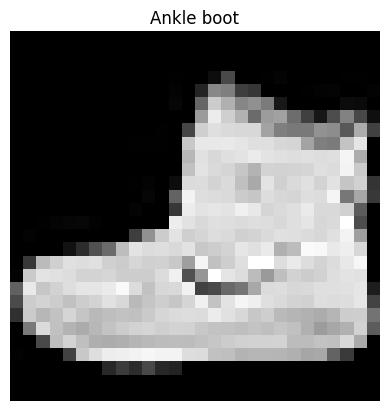

In [11]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")

# Plot the image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

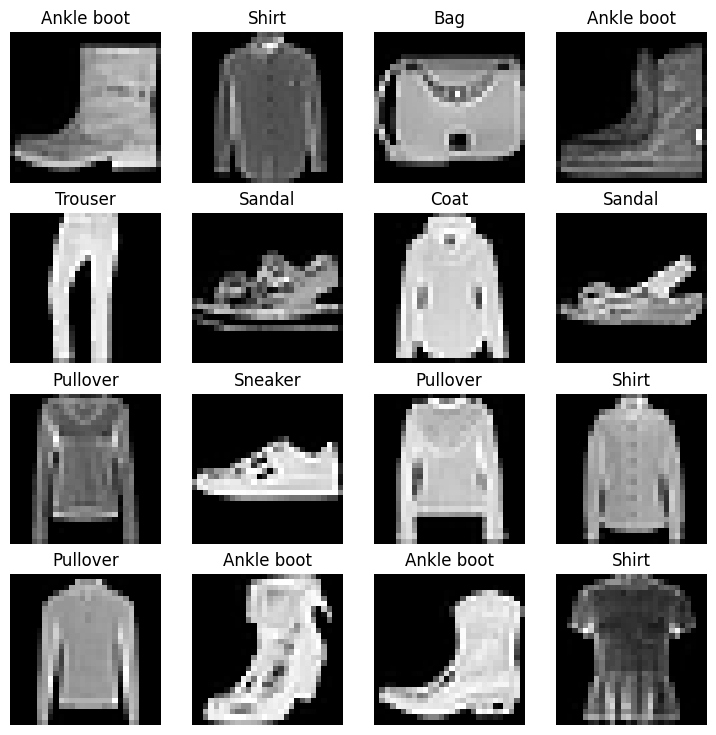

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare Dataloader
rn, we have data in form of pytorch datasets.

dataloader turns our dataset into python iterable

more specifically, we want to turn our data into batches/ mini batches

why to do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

for more on minibatches look up andrew ng minibatch gradient descent

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size HYPERPARAMETER
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)



In [14]:
# Lets checkout what we have created

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000294B5FD38E0>, <torch.utils.data.dataloader.DataLoader object at 0x00000294B5FD16F0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# check whats inside teh training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Image Size: torch.Size([1, 28, 28])
Label Size: 6, label size: torch.Size([])


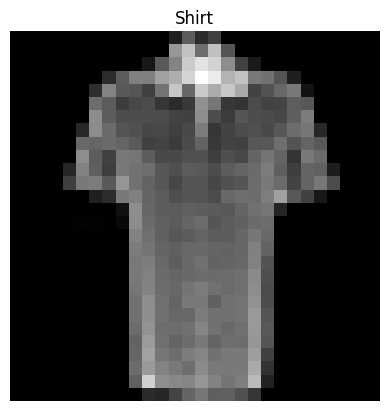

In [16]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size= [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(f"Image shape: {img.shape}")

# Plot the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label Size: {label}, label size: {label.shape}")

## 3. Model0: build a baseline model

when starting to build a series a of ml modelling experiments, its best to start with a baseline model

A baseline model is a simple model you try to improve upon with subsequent model/experiments

in short: start simple and then add complexity when necessary

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# lets flatten
output = flatten_model(x)

# print output
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)


In [19]:
torch.manual_seed(42)

# SEtup model with inpute parameters

model_0 = FashionMNISTModelV0(
    input_shape= 784, # this is 28*28
    hidden_units= 10,
    output_shape= len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss Function - since we have multiclass so `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Accuracy - `torchmetrics.Accuracy()`

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [23]:
# import accuracy metric
from helper_functions import accuracy_fn

# import loss function
loss_fn = nn.CrossEntropyLoss()

# import optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)


### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time.

  Args:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running on. Defaults to None.
    Prints time difference between start and end

  """


  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [25]:
start_time = default_timer()

end_time = default_timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = "cpu")

Train time on cpu: 0.000 seconds


3.0300001526484266e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = default_timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Put data on the target device
train_features = train_features_batch.to(device = "cpu")
train_labels = train_labels_batch.to(device = "cpu")

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. forward pass

    y_logits = model_0(X)

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss    #accumulate the train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")


  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader) # avg loss per epoch


  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass

      test_logits = model_0(X_test)

      # 2. Calculate the loss
      test_loss += loss_fn(test_logits, y_test)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_logits.argmax(dim = 1))

    # calculate the avg test loss and acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")


# Calculate the training time
train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                          end = train_time_end_on_cpu,
                                          device = str(next(model_0.parameters()).device))






c:\Users\Anubhav\miniconda3\envs\nn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:08<00:17,  8.57s/it]


Train Loss: 0.5904 | Test Loss: 0.5095, Test Acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:17<00:08,  8.57s/it]


Train Loss: 0.4763 | Test Loss: 0.4799, Test Acc: 83.1969
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:25<00:00,  8.58s/it]


Train Loss: 0.4550 | Test Loss: 0.4766, Test Acc: 83.4265
Train time on cpu: 25.750 seconds


## 4. Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               ):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module):

  """
  loss, acc = 0,0
  model.eval()
  
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# calculate model 0 results on test dataset

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a gpu is there is one)

In [28]:
torch.cuda.is_available()

True

In [29]:
# Setup device agnostic code

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: building a better model with non-linearity

we learned abt power of non linearity in last book

In [30]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

next(model_0.parameters()).device


device(type='cpu')

In [31]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [32]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

Let's create function for:
* Training loop - `train_step()`
* Trsting loop - `test_step()`

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [35]:

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [36]:
torch.manual_seed(42)

train_time_start_on_gpu = default_timer()

# Set epochs
epochs = 3

# Put data on the target device
train_features = train_features_batch.to(device = device)
train_labels = train_labels_batch.to(device = device)

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = model_1, data_loader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn)
  test_step(model = model_1, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)

train_time_end_on_gpu = default_timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                          end = train_time_end_on_gpu,
                                          device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:10<00:20, 10.13s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:21<00:10, 10.66s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:32<00:00, 10.75s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda:0: 32.263 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU
2. The hardware you're using has a better CPU in terms compute capability than the GPU

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [38]:
total_train_time_model_0

25.749681900000724

In [39]:
total_train_time_model_1

32.26305330000105

In [40]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network(CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patters in visual data

for more info go to CNN explainer.

In [41]:
# Create a CNN:

class FashionMNISTModelV2(nn.Module):
    """ 
    Model architecture that replicates the TinyVGG
    model from cnn explainer website.
    """

    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape, # conv2d means our data is 2 dimensional, we have conv1d and conv3d too
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding= 1), # values we can set ourselves in our NN's are called hyperparameters. 
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units, 
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                       out_channels= hidden_units,
                       kernel_size = 3, 
                       stride = 1,
                       padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units* 7*7,      # trick to calculate this
                      out_features= output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")

        return x



In [42]:
image.shape # (color channels, height, width)

torch.Size([1, 28, 28])

In [43]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape= 1, # because our images are black and white so they are 1
                              hidden_units= 10,
                              output_shape= len(class_names)
                              ).to(device)

In [44]:
rand_image_tensor = torch.randn(size=(1,1,28,28)).to(device)


In [45]:
rand_image_tensor_output = model_2(rand_image_tensor)

In [46]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through nn.Conv2d

refer vids for nn.conv2d to visualize

In [47]:
torch.manual_seed(42)

# create a batch of images 
images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [48]:
torch.manual_seed(42)
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels= 10,
                       kernel_size= 3,
                       stride= 1,
                       padding= 0
                    ) 
"""initially while starting out we might not know what to set these hyper parameters
                      so what is the best approach is to fetch values from some other projects and see if it will work on your problem or not.
                      """


# pass data through the convolutional layer

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through nn.MaxPool2d

In [49]:
# print out original image without unsqueezed dimention
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.shape}")

# create a sample nn.Maxpool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size= 2)

# pass data the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data throguh max pool layer

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv layer and max pool layer: {test_image_through_conv_and_max_pool.shape}")



Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([3, 64, 64])
shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv layer and max pool layer: torch.Size([10, 31, 31])


In [50]:
torch.manual_seed(42)

# create a smaller tensor
random_tensor = torch.randn(size=(1,2,2))

max_pool_layer = nn.MaxPool2d(kernel_size= 2)

# pass random through maxpool

random_tensor_through_maxpool = max_pool_layer(random_tensor)

print(f"Shape of random tensor: {random_tensor.shape}")
print(f"Random tensor: {random_tensor}")
print(f"shape of random tensor after going through maxpool layer: {random_tensor_through_maxpool.shape}")
print(f"Random tensor through maxpool: {random_tensor_through_maxpool}")

Shape of random tensor: torch.Size([1, 2, 2])
Random tensor: tensor([[[0.3367, 0.1288],
         [0.2345, 0.2303]]])
shape of random tensor after going through maxpool layer: torch.Size([1, 1, 1])
Random tensor through maxpool: tensor([[[0.3367]]])


### 7.3 Setup a loss function and optimizer for model 2

In [51]:
# Setup loss function/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_2.parameters(),
                            lr = 0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure the time

from timeit import default_timer as timer 

train_time_start_model_2 = timer()

#Train and test model

epoch = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_step(model= model_2, 
               data_loader= train_dataloader,
               loss_fn = loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn,
               device=device)
    
    test_step(model= model_2, 
               data_loader= train_dataloader,
               loss_fn = loss_fn,
               accuracy_fn= accuracy_fn,
               device=device)
    

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start= train_time_start_model_2, end = train_time_end_model_2, device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.60435 | Train accuracy: 78.02%


 33%|███▎      | 1/3 [00:21<00:42, 21.45s/it]

Test loss: 0.37827 | Test accuracy: 86.45%

Epoch: 1
-----
Train loss: 0.35511 | Train accuracy: 87.28%


 67%|██████▋   | 2/3 [00:42<00:21, 21.17s/it]

Test loss: 0.36720 | Test accuracy: 86.91%

Epoch: 2
-----
Train loss: 0.32126 | Train accuracy: 88.47%


100%|██████████| 3/3 [01:03<00:00, 21.27s/it]

Test loss: 0.32324 | Test accuracy: 88.13%

Train time on cuda: 63.818 seconds


In [53]:
# get model_2 results

model_2_results = eval_model(
    model= model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn,
    device= device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3543439209461212,
 'model_acc': 87.00079872204473}

In [54]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [55]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.354344,87.000799


In [56]:
compare_results["Training time"] = [total_train_time_model_0, 
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,Training time
0,FashionMNISTModelV0,0.476639,83.426518,25.749682
1,FashionMNISTModelV1,0.685001,75.019968,32.263053
2,FashionMNISTModelV2,0.354344,87.000799,63.817586


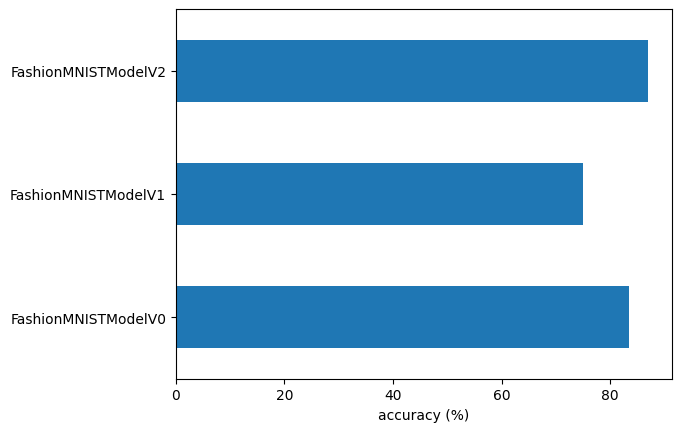

In [57]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("");

## 9. Make and evaluate random predictions with best model

In [58]:
def make_predictions(model: torch.nn.Module,
                     data = list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample, dim = 0).to(device) # unsqueeze is needed to hidden layer to work

            # do a forward pass
            pred_logit = model(sample)

            # get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)

            # Get pred_prob off gpu for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor

    return torch.stack(pred_probs)

In [59]:
import random

# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape

test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

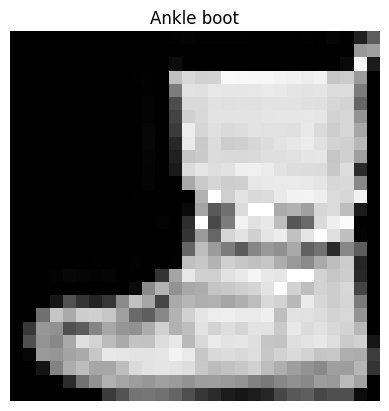

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [61]:
# Make predictions
pred_probs = make_predictions(model= model_2,
                              data= test_samples)

# view first 2 prediction probabilities
pred_probs[:2]




tensor([[4.0788e-06, 5.0150e-07, 2.5823e-06, 2.4305e-05, 2.0289e-07, 2.6203e-03,
         1.4536e-05, 1.2167e-03, 1.1260e-03, 9.9499e-01],
        [2.9503e-02, 1.2628e-02, 6.4102e-01, 1.0959e-01, 4.6877e-02, 6.9019e-04,
         1.2937e-01, 1.1338e-03, 2.8167e-02, 1.0180e-03]])

In [62]:
# convert pred probs to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([9, 2, 8, 4, 0, 5, 4, 1, 4])

In [63]:
test_labels

[9, 2, 8, 6, 0, 5, 4, 1, 2]

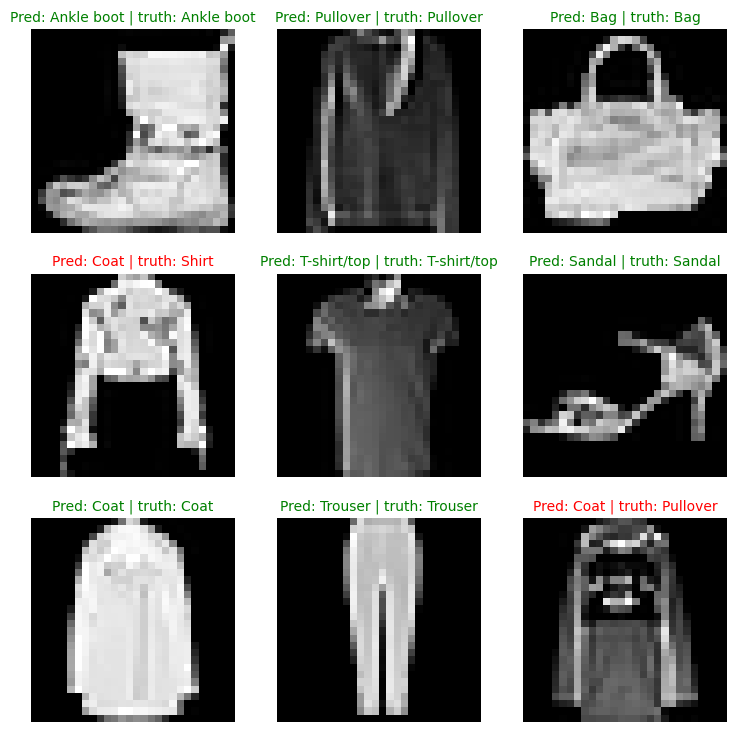

In [64]:
# Plot predictions 
plt.figure(figsize= (9,9))
nrows= 3
ncols= 3
for i, sample in enumerate(test_samples):
    
    plt.subplot(nrows,ncols, i+1)

    #plot target
    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]

    # get truth label
    truth_label = class_names[test_labels[i]]

    # create title
    title_text = f"Pred: {pred_label} | truth: {truth_label}"

    # check equality
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c='g') # if correct prediction
    
    else:
        plt.title(title_text, fontsize= 10, c='r')
    
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evalutating your classification ,odels


1. Make predictions with our trained model on test datasets
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot.confusion_matrix()`

In [65]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc= "Making predictions...."):
        # Send the data and targets to target device
        X,y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim= 0).argmax(dim = 1)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tenson
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....: 100%|██████████| 313/313 [00:01<00:00, 170.19it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [66]:
y_pred_tensor.shape

torch.Size([10000])

In [67]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task= "multiclass", num_classes= len(class_names))

confmat_tensor = confmat(preds= y_pred_tensor,
                         target = test_data.targets)




In [73]:
confmat_tensor

tensor([[560,   4,  38,  55,  15,   1, 317,   0,  10,   0],
        [ 12, 806,   6, 134,  32,   0,   7,   0,   3,   0],
        [  9,   2, 809,   9, 121,   0,  39,   0,  11,   0],
        [ 28,  12,  26, 832,  51,   0,  44,   0,   7,   0],
        [  3,   6, 137,  35, 763,   0,  44,   0,  12,   0],
        [  3,   3,   2,   3,   0, 843,   2,  84,  40,  20],
        [ 60,   5, 147,  47, 177,   0, 551,   0,  13,   0],
        [  1,   0,   0,   0,   0,  22,   0, 944,   4,  29],
        [  7,   2,  24,  14,  19,   4,  18,   7, 904,   1],
        [  0,   0,   0,   2,   0,  36,   2, 107,  10, 843]])

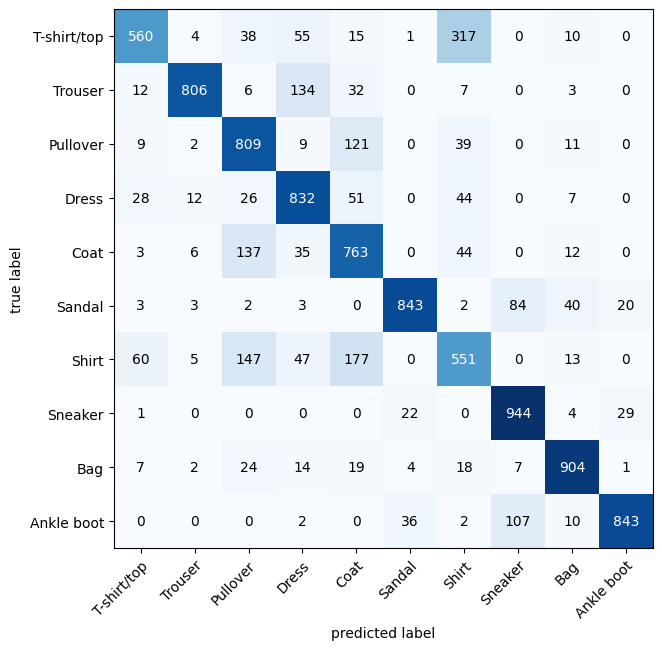

In [74]:
# 3. plot our confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names=class_names,
    figsize= (10,7)
)

In [75]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [76]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

C:\Users\Anubhav\AppData\Local\Temp\ipykernel_16460\3689379356.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PAT

In [80]:
# Evaluate loaded model
# torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3543439209461212,
 'model_acc': 87.00079872204473}

In [81]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3543439209461212,
 'model_acc': 87.00079872204473}

In [82]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-04, # absolute tolerance
              rtol=1e-04) # relative tolerance

tensor(True)